In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/Training/pituitary/Tr-pi_0789.jpg
/kaggle/input/Training/pituitary/Tr-pi_1445.jpg
/kaggle/input/Training/pituitary/Tr-pi_0605.jpg
/kaggle/input/Training/pituitary/Tr-pi_0882.jpg
/kaggle/input/Training/pituitary/Tr-pi_1274.jpg
/kaggle/input/Training/pituitary/Tr-pi_0339.jpg
/kaggle/input/Training/pituitary/Tr-pi_1271.jpg
/kaggle/input/Training/pituitary/Tr-pi_0

# **Importing Libraries**

In [2]:
# Import OS libraries
import os
import itertools

# Data handling tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,  BatchNormalization, Activation, Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")


# Check GPU availability
print("GPU is available" if tf.config.list_physical_devices('GPU') else "GPU is not available")

sns.set_style('whitegrid')

GPU is available


In [3]:
import warnings
warnings.filterwarnings('ignore')

# **Data Exploration**

In [4]:
# Specify the path to the dataset
train_brain_tumor_mri_dataset = "/kaggle/input/Training"


# Initialize lists to store file paths and labels
data = []


# Loop through each class folder
for tumor_type in os.listdir(train_brain_tumor_mri_dataset):
    tumor_type_path = os.path.join(train_brain_tumor_mri_dataset, tumor_type)
    
    # Loop through each image in the class folder
    for filename in os.listdir(tumor_type_path):
        img_path = os.path.join(tumor_type_path, filename)
        
        # Assign label based on folder name
        label = tumor_type
        
        # Append data tuple (image path, label) to the list
        data.append((img_path, label))

# Create a DataFrame from the list
train = pd.DataFrame(data, columns=['image_path', 'label'])

train.head()

,image_path,label
0,/kaggle/input/Training/pituitary/Tr-pi_0532.jpg,pituitary
1,/kaggle/input/Training/pituitary/Tr-pi_0282.jpg,pituitary
2,/kaggle/input/Training/pituitary/Tr-pi_1401.jpg,pituitary
3,/kaggle/input/Training/pituitary/Tr-pi_0914.jpg,pituitary
4,/kaggle/input/Training/pituitary/Tr-pi_0691.jpg,pituitary


In [5]:
# Specify the path to the dataset
test_brain_tumor_mri_dataset = "/kaggle/input/Testing"

# Initialize lists to store file paths and labels
data = []

# Loop through each class folder
for tumor_type in os.listdir(test_brain_tumor_mri_dataset):
    tumor_type_path = os.path.join(test_brain_tumor_mri_dataset, tumor_type)
    
    # Loop through each image in the class folder
    for filename in os.listdir(tumor_type_path):
        img_path = os.path.join(tumor_type_path, filename)
        
        # Assign label based on folder name
        label = tumor_type
        
        # Append data tuple (image path, label) to the list
        data.append((img_path, label))

# Create a DataFrame from the list
test = pd.DataFrame(data, columns=['image_path', 'label'])

test.head()

,image_path,label
0,/kaggle/input/Testing/pituitary/Te-pi_0059.jpg,pituitary
1,/kaggle/input/Testing/pituitary/Te-pi_0024.jpg,pituitary
2,/kaggle/input/Testing/pituitary/Te-pi_0232.jpg,pituitary
3,/kaggle/input/Testing/pituitary/Te-pi_0286.jpg,pituitary
4,/kaggle/input/Testing/pituitary/Te-pi_0233.jpg,pituitary


# **Data Visualization**

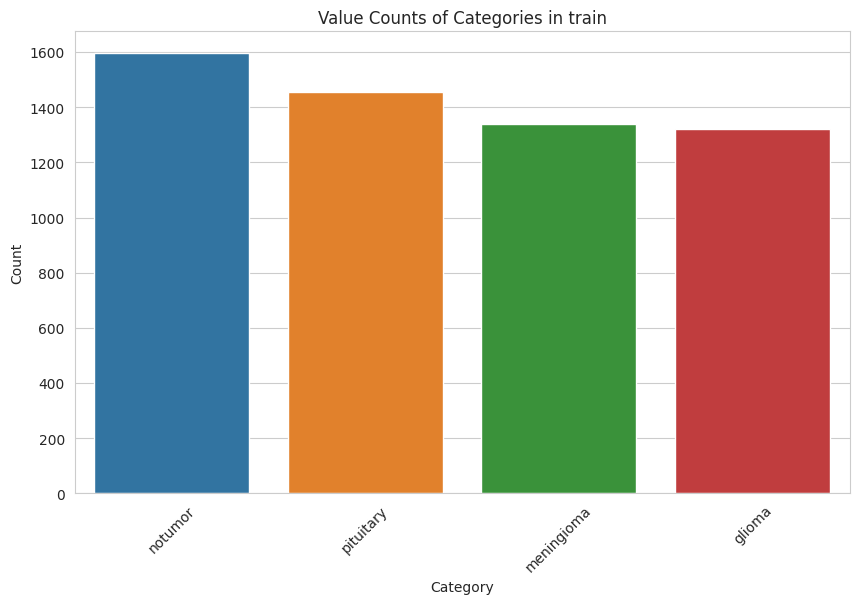

In [6]:
value_counts = train['label'].value_counts()

# Convert the Series to a DataFrame for easier plotting
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['Category', 'Count']

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=value_counts_df)
plt.xticks(rotation=45)
plt.title('Value Counts of Categories in train')
plt.show()

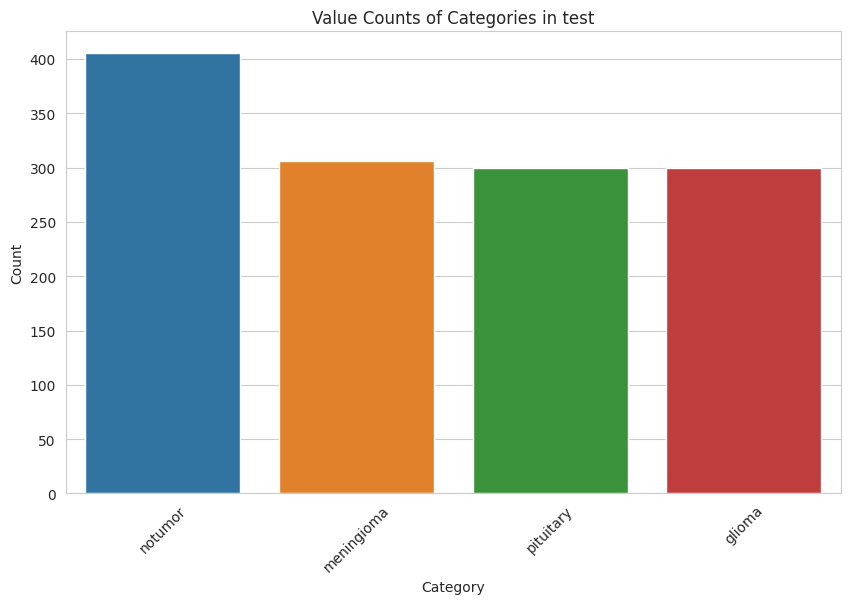

In [7]:
value_counts = test['label'].value_counts()

# Convert the Series to a DataFrame for easier plotting
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['Category', 'Count']

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=value_counts_df)
plt.xticks(rotation=45)
plt.title('Value Counts of Categories in test')
plt.show()

In [8]:
train_data, valid_data = train_test_split(train, test_size=0.2, random_state=42, shuffle = True , stratify=train['label'])

# Display the shape of the resulting sets
print(f"Training set shape: {train_data.shape}")
print(f"Validation set shape: {valid_data.shape}")
print(f"Testing set shape: {test.shape}")

Training set shape: (4569, 2)
Validation set shape: (1143, 2)
Testing set shape: (1311, 2)


In [9]:
# Create an ImageDataGenerator for training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
valid_test_datagen = ImageDataGenerator(rescale=1./255)

# Specify the input size expected by the model
input_size = (224, 224)
# Create data generators for training, validation, and testing
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='image_path',
    y_col='label',
    target_size=input_size,
    shuffle = True, 
    batch_size=16,
    class_mode='categorical',  
    color_mode = 'rgb'
)

valid_generator = valid_test_datagen.flow_from_dataframe(
    dataframe=valid_data,
    x_col='image_path',
    y_col='label',
    target_size=input_size,
    shuffle = True, 
    batch_size=16,
    class_mode='categorical',
    color_mode = 'rgb'
)

test_generator = valid_test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='image_path',
    y_col='label',
    target_size=input_size,
    shuffle=False,  
    batch_size=16,
    class_mode='categorical',
    color_mode = 'rgb'
)

Found 4569 validated image filenames belonging to 4 classes.
Found 1143 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


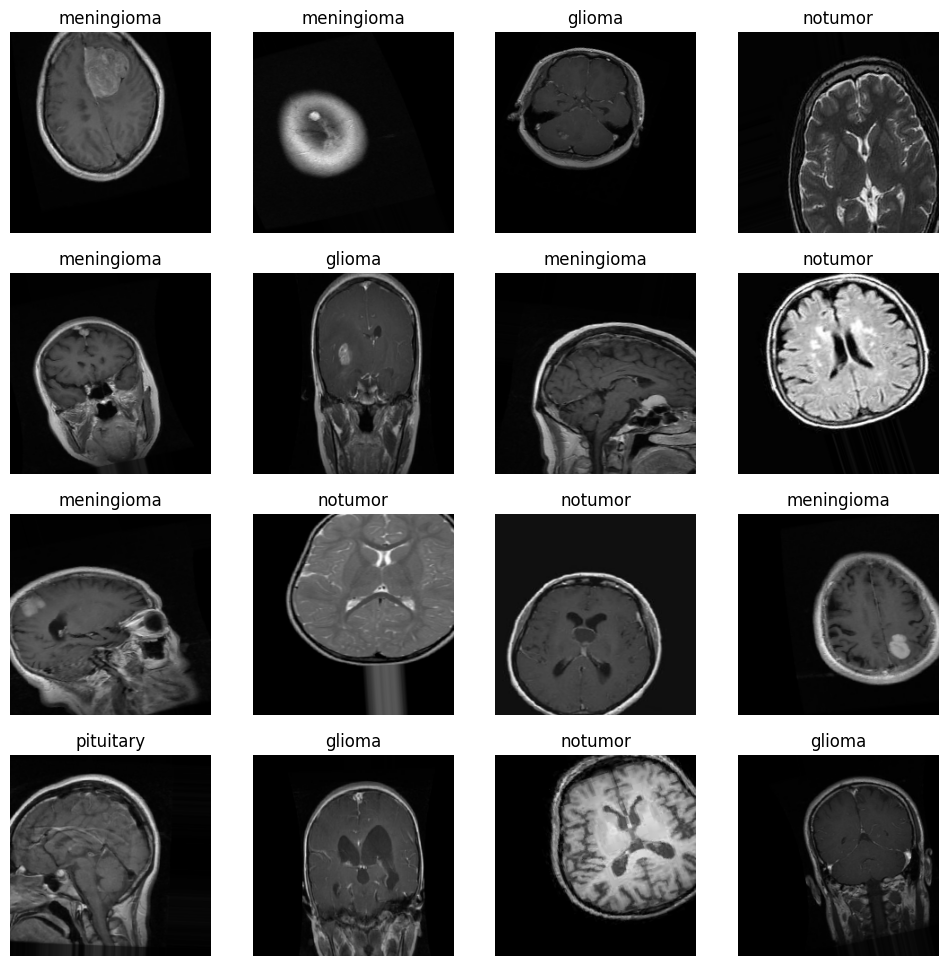

In [10]:
sample_images, sample_labels = next(train_generator)

# Display the images and labels
plt.figure(figsize=(12, 12))
for i in range(16):
    image = sample_images[i]
    label_index = np.argmax(sample_labels[i]) 
    label = list(train_generator.class_indices.keys())[label_index]  

    plt.subplot(4, 4, i+1)
    plt.imshow(image)
    plt.title(label, color='k', fontsize=12)
    plt.axis("off")

plt.show()

# **CNN Model**

In [11]:
input_shape = (224, 224, 3)  

# Create a Sequential model
model = Sequential()

# Convolutional layers
model.add(Conv2D(512, (3, 3), padding='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.35))

model.add(Dense(4, activation='softmax'))  # Output layer with 4 neurons for the 4 classes

# Compile the model
model.compile(Adamax(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 512)  │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 512)  │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 224, 224, 512)  │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 512)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 256)  │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,232,900 (39.04 MB)

 Trainable params: 10,232,900 (39.04 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('brain_tumors/best_model.keras', save_best_only=True)

In [14]:
history = model.fit(train_generator, epochs=14, validation_data=valid_generator,
                    validation_steps = None , shuffle = False,
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/20
285/286 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3399 - loss: 2.4138

2024-08-26 06:57:42.913805: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng35{k2=4,k3=0} for conv (f32[9,512,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[9,512,224,224]{3,2,1,0}, f32[512,512,3,3]{3,2,1,0}, f32[512]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-08-26 06:57:43.111273: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.197573154s
Trying algorithm eng35{k2=4,k3=0} for conv (f32[9,512,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[9,512,224,224]{3,2,1,0}, f32[512,512,3,3]{3,2,1,0}, f32[512]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"

286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3403 - loss: 2.4112

2024-08-26 06:58:56.614612: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng36{k2=3,k3=0} for conv (f32[7,512,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[7,512,224,224]{3,2,1,0}, f32[512,512,3,3]{3,2,1,0}, f32[512]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-08-26 06:58:56.621162: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.006677211s
Trying algorithm eng36{k2=3,k3=0} for conv (f32[7,512,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[7,512,224,224]{3,2,1,0}, f32[512,512,3,3]{3,2,1,0}, f32[512]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"

286/286 ━━━━━━━━━━━━━━━━━━━━ 400s 1s/step - accuracy: 0.3408 - loss: 2.4087 - val_accuracy: 0.4751 - val_loss: 1.3182
Epoch 2/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.6044 - loss: 1.0812 - val_accuracy: 0.4952 - val_loss: 1.2474
Epoch 3/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.6359 - loss: 0.9569 - val_accuracy: 0.5573 - val_loss: 1.0507
Epoch 4/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.6602 - loss: 0.8641 - val_accuracy: 0.6693 - val_loss: 0.8503
Epoch 5/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.7126 - loss: 0.8005 - val_accuracy: 0.7410 - val_loss: 0.7234
Epoch 6/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.7108 - loss: 0.7916 - val_accuracy: 0.7139 - val_loss: 0.9286
Epoch 7/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.7348 - loss: 0.7531 - val_accuracy: 0.7262 - val_loss: 0.7802
Epoch 8/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.7347 - loss: 0.7206 - val_accuracy: 0.638

# **Evaluation of CNN Model**

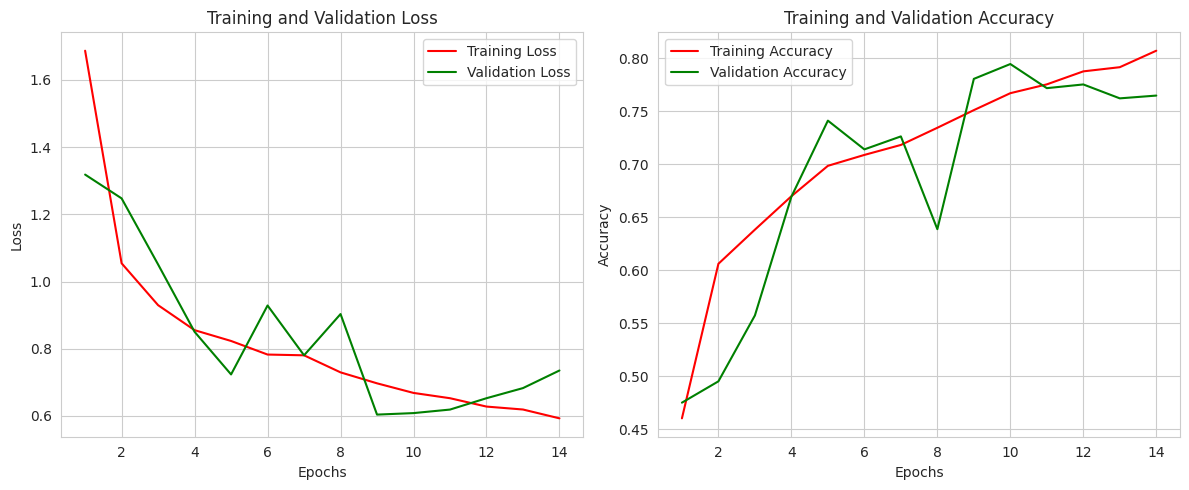

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Extract metrics from the training history
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Define epochs
epochs = np.arange(1, len(train_acc) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Evaluate the model on the training set
train_score = model.evaluate(train_generator)
print(f"Training Loss: {train_score[0]}, Training Accuracy: {train_score[1]}")

# Evaluate the model on the validation set
valid_score = model.evaluate(valid_generator)
print(f"Validation Loss: {valid_score[0]}, Validation Accuracy: {valid_score[1]}")

# Evaluate the model on the test set
test_score = model.evaluate(test_generator)
print(f"Test Loss: {test_score[0]}, Test Accuracy: {test_score[1]}")

286/286 ━━━━━━━━━━━━━━━━━━━━ 104s 361ms/step - accuracy: 0.7592 - loss: 0.6775
Training Loss: 0.6778281331062317, Training Accuracy: 0.7644999027252197
72/72 ━━━━━━━━━━━━━━━━━━━━ 26s 360ms/step - accuracy: 0.7804 - loss: 0.6094
Validation Loss: 0.6038228273391724, Validation Accuracy: 0.780402421951294
81/82 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.7777 - loss: 0.6853

2024-08-26 08:18:29.957390: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng20{k2=0,k4=2,k5=1,k6=0,k7=0} for conv (f32[15,512,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[15,512,224,224]{3,2,1,0}, f32[512,512,3,3]{3,2,1,0}, f32[512]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-08-26 08:18:30.213145: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.255976919s
Trying algorithm eng20{k2=0,k4=2,k5=1,k6=0,k7=0} for conv (f32[15,512,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[15,512,224,224]{3,2,1,0}, f32[512,512,3,3]{3,2,1,0}, f32[512]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasAct

82/82 ━━━━━━━━━━━━━━━━━━━━ 55s 677ms/step - accuracy: 0.7768 - loss: 0.6864
Test Loss: 0.7321242094039917, Test Accuracy: 0.739130437374115


In [17]:
preds = model.predict(test_generator)

y_pred = np.argmax(preds, axis=1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 29s 358ms/step


[[223  65   6   6]
 [ 47 130 105  24]
 [  4   1 394   6]
 [ 19  20  39 222]]


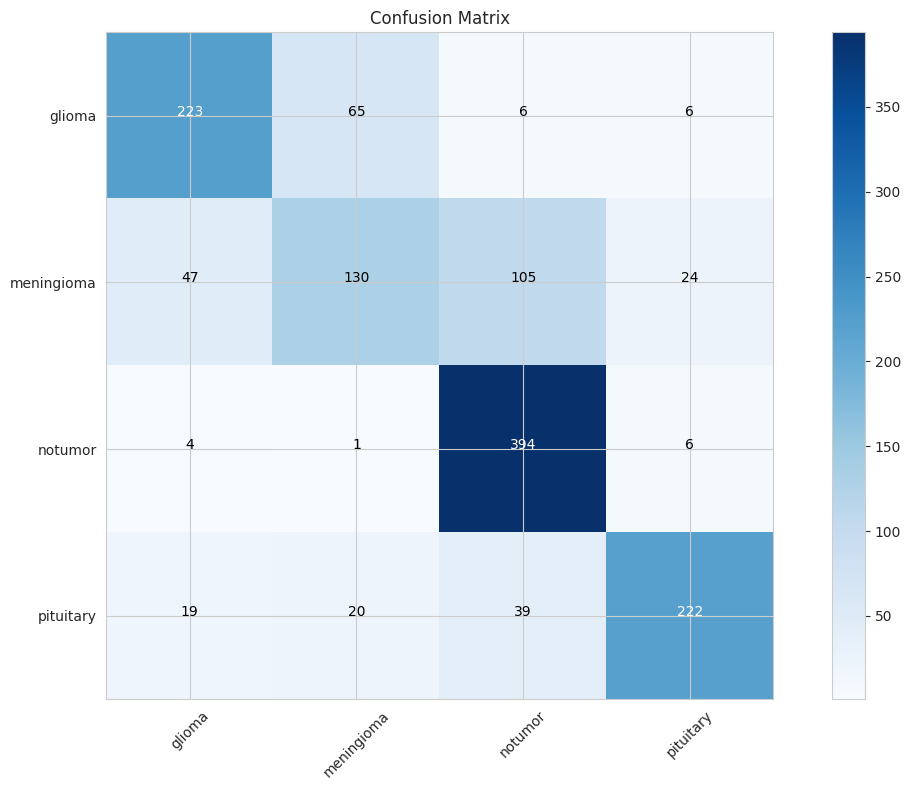

In [20]:
g_dict = test_generator.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

print(cm)

plt.figure(figsize= (12, 8))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()

plt.show()

In [21]:
print(classification_report(test_generator.classes, y_pred , target_names= classes ))

              precision    recall  f1-score   support

      glioma       0.76      0.74      0.75       300
  meningioma       0.60      0.42      0.50       306
     notumor       0.72      0.97      0.83       405
   pituitary       0.86      0.74      0.80       300

    accuracy                           0.74      1311
   macro avg       0.74      0.72      0.72      1311
weighted avg       0.74      0.74      0.73      1311



# **SVM Model**

In [22]:
# Directory paths
train_dir = '/kaggle/input/Training/'
val_dir = '/kaggle/input/Testing/'

def load_images_from_directory(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for img_file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, img_file)
                try:
                    img = Image.open(img_path).convert('RGB')  # Convert to RGB
                    img = img.resize((224, 224))  # Resize images to a fixed size
                    img_array = np.array(img).flatten()  # Flatten to 1D array
                    images.append(img_array)
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

In [23]:
# Load training and validation data
X_train, y_train = load_images_from_directory(train_dir)
X_val, y_val = load_images_from_directory(val_dir)

In [24]:
# Encode labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [25]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [28]:
# Create an SVM model with a linear kernel
svm_model = SVC(kernel='rbf', gamma='scale')

# Train the model
svm_model.fit(X_train_scaled, y_train_encoded)

SVC()

In [37]:
# Save the trained model to a file
joblib.dump(svm_model, 'svm_model.pkl')


['svm_model.pkl']

In [29]:
# Load the saved model from the file
loaded_model = joblib.load('svm_model.pkl')
# Predict on the validation set
y_val_pred = loaded_model.predict(X_val_scaled)

# **Evaluation of SVM Model**

In [30]:
# Print classification report
print(classification_report(y_val_encoded, y_val_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

      glioma       0.85      0.84      0.85       300
  meningioma       0.83      0.79      0.81       306
     notumor       0.95      0.97      0.96       405
   pituitary       0.94      0.98      0.96       300

    accuracy                           0.90      1311
   macro avg       0.89      0.89      0.89      1311
weighted avg       0.90      0.90      0.90      1311



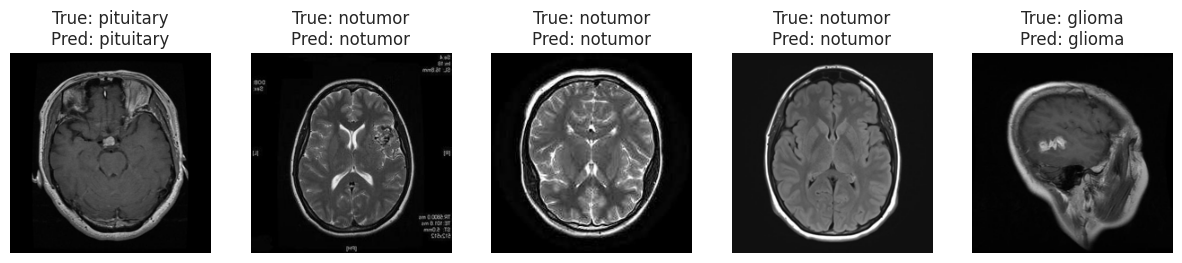

In [34]:
def plot_sample_images(X, y_true, y_pred, labels, sample_size=5):
    indices = np.random.choice(len(X), sample_size, replace=False)
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(indices):
        plt.subplot(1, sample_size, i + 1)
        plt.imshow(X[idx].reshape(224, 224, 3))  
        plt.title(f"True: {labels[y_true[idx]]}\nPred: {labels[y_pred[idx]]}")
        plt.axis('off')
    plt.show()

# Plot some sample images
plot_sample_images(X_val, y_val_encoded, y_val_pred, label_encoder.classes_)


In [35]:
# Predict and evaluate SVM
svm_accuracy = accuracy_score(y_val_encoded, y_val_pred)
svm_accuracy

0.8993135011441648

# **Comparing the Models accuracy**

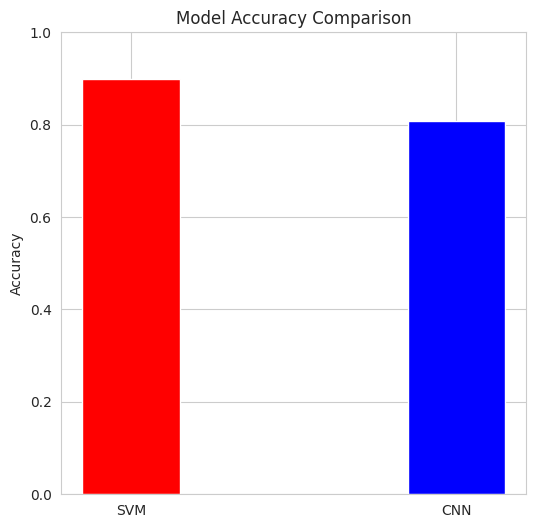

In [36]:
import numpy as np
import matplotlib.pyplot as plt


cnn_accuracy = history.history['accuracy'][-1]  

def plot_accuracy_comparison(svm_accuracy, cnn_accuracy):
    plt.figure(figsize=(6, 6))
    
    plt.bar(['SVM', 'CNN'], [svm_accuracy, cnn_accuracy], width=0.3,color=['red', 'blue'])
    plt.ylim(0, 1)
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    
    plt.show()

plot_accuracy_comparison(svm_accuracy, cnn_accuracy)
